<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/Intro_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONFIGURATION ENVIRONNEMENT DE TRAVAIL**

In [3]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [44.8 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [1]:
#Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import os

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:104: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


**TELECHARGEMENT DE DONNEES**

In [2]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O toilettes.csv https://opendata.paris.fr/explore/dataset/sanisettesparis/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B 
!wget -O velib.geojson https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr
!wget -O IRIS.geojson https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson&refine.dep=75&timezone=Europe/Berlin&lang=fr 

--2021-02-07 21:25:41--  https://opendata.paris.fr/explore/dataset/sanisettesparis/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘toilettes.csv’

toilettes.csv           [  <=>               ] 124.74K   603KB/s    in 0.2s    

2021-02-07 21:25:43 (603 KB/s) - ‘toilettes.csv’ saved [127729]

--2021-02-07 21:25:43--  https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘velib.geojson’

velib.geojson           [   <=>              ] 630.74K  1.17MB/s    i

**EXPLORATION DU DATASET DES TOILETTES**

In [3]:
#Importer CSV to dataframe

toilettes = pd.read_csv("toilettes.csv", sep=';')
toilettes.head()

type  ...                 geo_point_2d
0  SANISETTES  ...  48.8430740444,2.36433400263
1  SANISETTES  ...  48.8256858922,2.31505362415
2  SANISETTES  ...  48.8348792313,2.32414275734
3  SANISETTES  ...  48.8279445037,2.30565404276
4  SANISETTES  ...  48.8356684738,2.30259574654

[5 rows x 10 columns]

In [ ]:
#Checker les types de champ

toilettes.dtypes

type                    object
statut                  object
adresse                 object
arrondissement           int64
horaire                 object
acces_pmr               object
relais_bebe             object
url_fiche_equipement    object
geo_shape               object
geo_point_2d            object
dtype: object

In [ ]:
# Filtrer les données


WC2424 = toilettes[(toilettes["horaire"] == '24 h / 24')]

WC10 = toilettes[(toilettes["arrondissement"] >10)]

WCbis = toilettes[(toilettes["horaire"] == '24 h / 24') | (toilettes["horaire"] == '6 h - 22 h')]

WCter = toilettes[(toilettes["horaire"] == '24 h / 24') & (toilettes["statut"] == 'Ouvert')]

WC10.head(10)

type  ...                 geo_point_2d
0  SANISETTES  ...   48.8404714774,2.3268312111
1  SANISETTES  ...  48.8362409436,2.28169181692
2  SANISETTES  ...  48.8769298905,2.28595030976
3  SANISETTES  ...   48.8904544445,2.3546097155
4  SANISETTES  ...  48.8840786533,2.35342926719
5  SANISETTES  ...  48.8947410538,2.38202690795
6  SANISETTES  ...  48.8778639144,2.38125083002
7  SANISETTES  ...  48.8554039878,2.40008152078
8  SANISETTES  ...  48.8491004434,2.40258392889
9   TOILETTES  ...  48.8216649905,2.37589956567

[10 rows x 10 columns]

In [ ]:
#Compter le nombre d'enregistrements

toilettes['type'].size

161

statut
type                 
CABINE MOBILE      10
LAVATORY            0
SANISETTES        442
TOILETTES           1
URINOIR             3

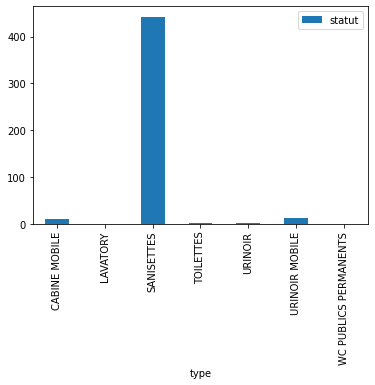

In [ ]:
# Regrouper les toilettes par type

ToilettesType = toilettes[["type", "statut"]].groupby("type").count()
ToilettesType.plot(kind="bar")
ToilettesType.head()

type
horaire                    
10 h - 22 h               1
24 h / 24               161
6 h - 1 h                32
6 h - 22 h              250
Voir fiche équipement   170

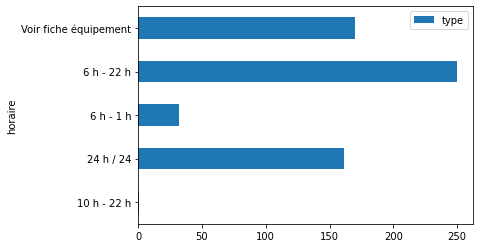

In [ ]:
# Regrouper les toilettes par horaire

ToilettesHoraire = toilettes[["horaire", "type"]].groupby("horaire").count()
ToilettesHoraire.plot(kind="barh")
ToilettesHoraire.head()

type
arrondissement      
1                 12
2                 12
3                 10
4                 18
5                 14

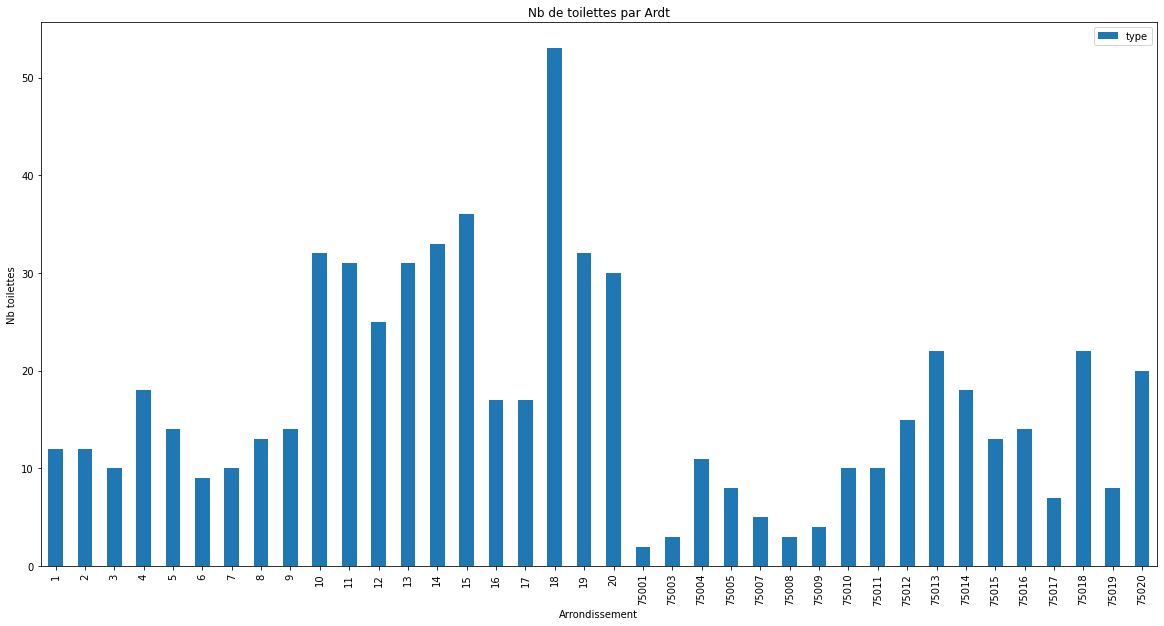

In [ ]:
#Compter le nombre de toilette par arrondissement

ToiletteARDT = toilettes[["arrondissement", "type"]].groupby("arrondissement").count()
ToiletteARDT.plot(figsize =(20,10), kind="bar")
plt.title("Nb de toilettes par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb toilettes")
ToiletteARDT.head()

**TRANSFORMER CSV EN GEODATAFRAME**

In [ ]:
#Séparer la columne des coordonnées géographiques

toilettes[['Latitude','Longitude']] = toilettes['geo_point_2d'].str.split(',', expand=True)
toilettes.head()

type statut  ...       Latitude      Longitude
0  SANISETTES  Fermé  ...  48.8404714774   2.3268312111
1  SANISETTES  Fermé  ...  48.8362409436  2.28169181692
2  SANISETTES  Fermé  ...  48.8769298905  2.28595030976
3  SANISETTES  Fermé  ...  48.8904544445   2.3546097155
4  SANISETTES  Fermé  ...  48.8840786533  2.35342926719

[5 rows x 12 columns]

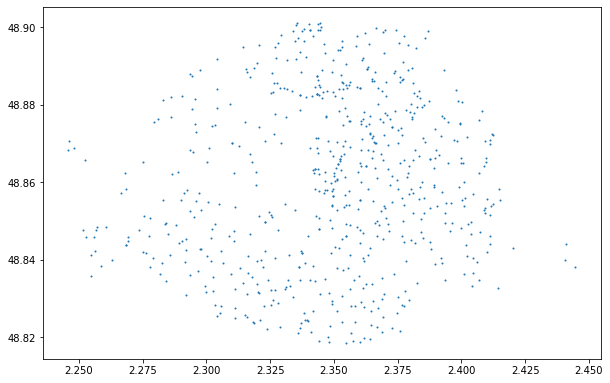

In [ ]:
#Dataframe to GeoDataframe

toilettes = gpd.GeoDataFrame(toilettes, crs = 'epsg:4326', geometry=gpd.points_from_xy(toilettes.Longitude, toilettes.Latitude))
toilettes.plot(figsize=(10,12), markersize=1)

**EXERCICE 1 AUTOUR DU DATASET DES ARBRES**

In [ ]:
# Exercice1 

## Importer la couche des arbres  
## Compter le nombre d'abres
## Proposer une visualisation du nb d'arbres par arrondissement
## Proposer une visualisation du nb d'arbres par domanialité
## Créer un géodataframe 

https://opendata.paris.fr/explore/dataset/les-arbres/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable



In [6]:
#Téléchargement des datas depuis l'opendata
!wget -O arbres.csv https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B 

--2021-02-07 21:06:34--  https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘arbres.csv’

arbres.csv              [              <=>   ]  30.14M   304KB/s    in 2m 11s  

2021-02-07 21:08:45 (236 KB/s) - ‘arbres.csv’ saved [31608080]



In [19]:
#Importer CSV to dataframe

arbres = pd.read_csv("arbres.csv", sep=';')
arbres.head()

idbase typeemplacement  ... remarquable                 geo_point_2d
0   275426           Arbre  ...         NON   48.8597190934,2.3114346242
1  2004479           Arbre  ...         NON   48.8339878453,2.4169089158
2  2012188           Arbre  ...         NON  48.8335214967,2.45485338706
3  2008902           Arbre  ...         NON    48.816887752,2.3476422875
4   208069           Arbre  ...         NON  48.8400642578,2.38123463605

[5 rows x 17 columns]

In [5]:
#Compter le nombre d'arbres

arbres['domanialite'].size

204921

idbase
arrondissement           
BOIS DE BOULOGNE     4117
BOIS DE VINCENNES   11835
HAUTS-DE-SEINE       5417
PARIS 10E ARRDT      3408
PARIS 11E ARRDT      5931

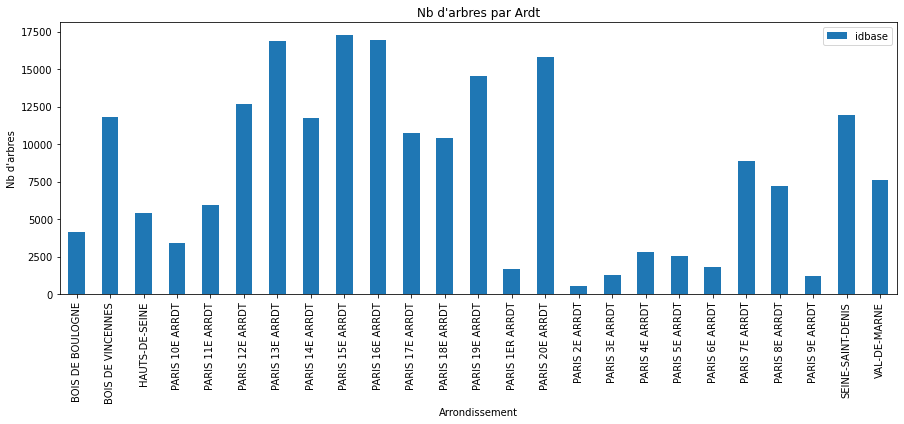

In [10]:
#Compter le nombre d'arbres par arrondissement

ArbresARDT = arbres[["arrondissement", "idbase"]].groupby("arrondissement").count()
ArbresARDT.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb d'arbres")
ArbresARDT.head()


idbase
domanialite        
Alignement   106179
CIMETIERE     32167
DAC              27
DASCO          7171
DASES            11

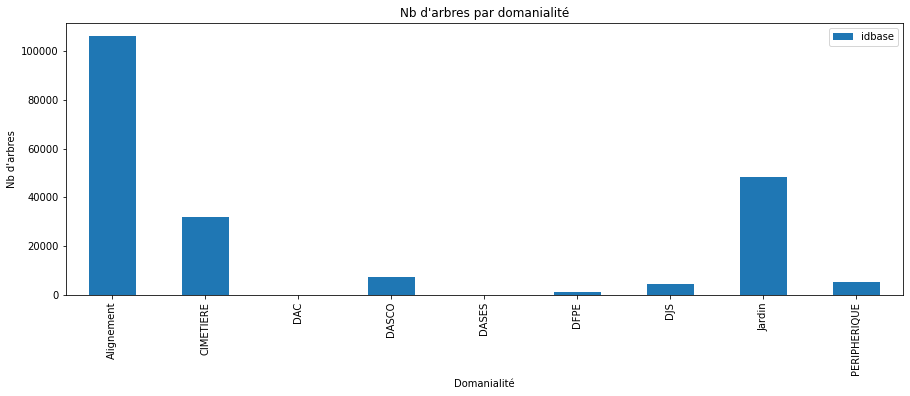

In [ ]:
#Compter le nombre d'arbres par type de domanialité

ArbresDomanialite = arbres[["domanialite", "idbase"]].groupby("domanialite").count()
ArbresDomanialite.plot(figsize =(15,5), kind="bar")
plt.title("Nb d'arbres par domanialité")
plt.xlabel("Domanialité")
plt.ylabel("Nb d'arbres")
ArbresDomanialite.head()

In [21]:
#Séparer la columne des coordonnées géographiques

arbres[['Latitude','Longitude']] = arbres['geo_point_2d'].str.split(',', expand=True)
arbres.head()


idbase typeemplacement  ...       Latitude      Longitude
0   275426           Arbre  ...  48.8597190934   2.3114346242
1  2004479           Arbre  ...  48.8339878453   2.4169089158
2  2012188           Arbre  ...  48.8335214967  2.45485338706
3  2008902           Arbre  ...   48.816887752   2.3476422875
4   208069           Arbre  ...  48.8400642578  2.38123463605

[5 rows x 19 columns]

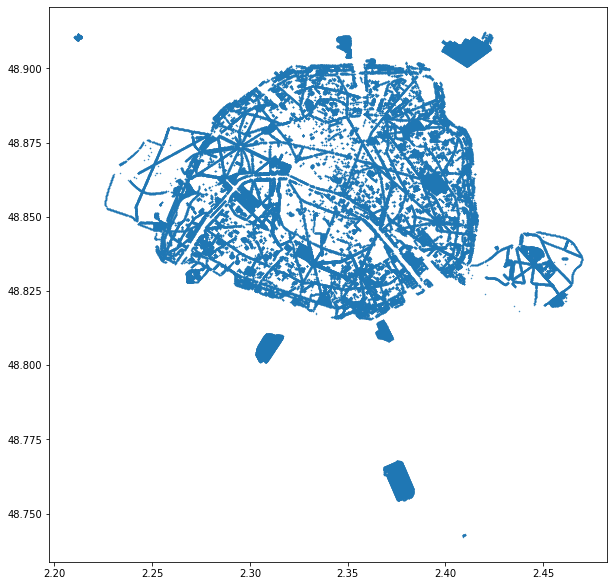

In [22]:
#Dataframe to GeoDataframe

arbres = gpd.GeoDataFrame(arbres, crs = 'epsg:4326', geometry=gpd.points_from_xy(arbres.Longitude, arbres.Latitude))
arbres.plot(figsize=(10,12), markersize=0.2)

iris  ...                                           geometry
0  2502  ...  POLYGON ((2.32558 48.85589, 2.32562 48.85574, ...
1  3209  ...  POLYGON ((2.31961 48.87451, 2.31860 48.87435, ...
2  2901  ...  POLYGON ((2.30624 48.86700, 2.30503 48.86640, ...
3  3202  ...  POLYGON ((2.31054 48.87749, 2.31104 48.87752, ...
4  3806  ...  POLYGON ((2.35578 48.87653, 2.35602 48.87624, ...

[5 rows x 8 columns]

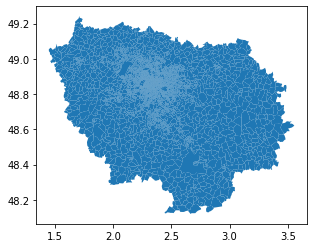

In [6]:
#Importer le couche des IRIS

IRIS= gpd.read_file("IRIS.geojson", encoding='utf-8')
IRIS.plot()
IRIS.head()

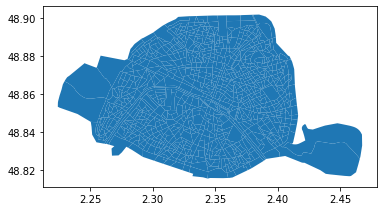

In [7]:
#Garder les IRIS de Paris

IRISPARIS = IRIS[(IRIS["dep"] == 75)]
IRISPARIS.plot()

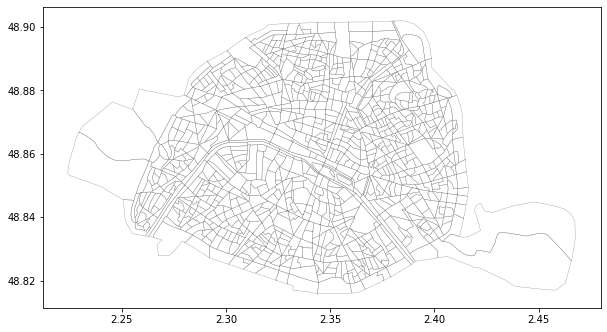

In [ ]:
#Cartographier les IRIS en mode contours

IRISPARIS.boundary.plot(figsize=(10,10), linewidth=0.3, color = 'grey')

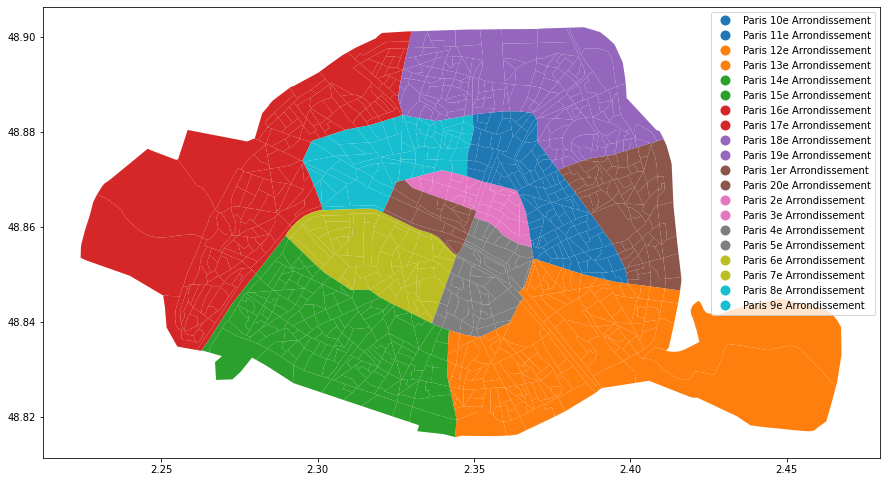

In [ ]:
#Cartographier les IRIS en fonction de l'arrondissement

IRISPARIS.plot(column = 'nom_com', linewidth=0.5, figsize=(15,20), legend=True)

ebike  capacity  ... is_returning                  geometry
0      1        35  ...          OUI  POINT (2.27572 48.86598)
1      7        21  ...          OUI  POINT (2.33736 48.87930)
2      5        55  ...          OUI  POINT (2.33910 48.85376)
3      6        46  ...          OUI  POINT (2.34367 48.85152)
4      3        20  ...          OUI  POINT (2.39257 48.85591)

[5 rows x 13 columns]

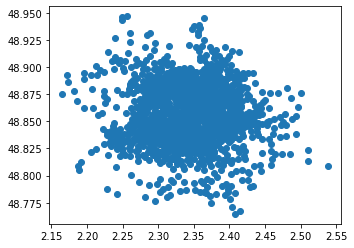

In [ ]:
#Importer la couche des velibs

Velib= gpd.read_file("velib.geojson", encoding='utf-8')
Velib.plot()
Velib.head()

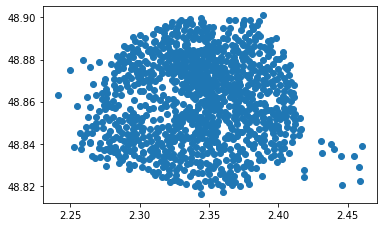

In [ ]:
#Ne garder que les stations de Velibs de la ville de Paris

VelibParis = gpd.overlay(Velib, IRISPARIS, how='intersection')
VelibParis.plot()


In [ ]:
#Calculer des statistiques basiques pour tous les champs

VelibParis.describe()

ebike    capacity  ...     insee_com     code_iris
count  999.000000  999.000000  ...    999.000000  9.990000e+02
mean     4.295295   32.299299  ...  75112.359359  7.511284e+08
std      3.214429   12.846851  ...      5.200970  5.409262e+04
min      0.000000    0.000000  ...  75101.000000  7.510101e+08
25%      2.000000   23.000000  ...  75109.000000  7.510933e+08
50%      4.000000   30.000000  ...  75113.000000  7.511350e+08
75%      6.000000   39.000000  ...  75117.000000  7.511765e+08
max     25.000000   74.000000  ...  75120.000000  7.512080e+08

[8 rows x 9 columns]

In [ ]:
#Calculer le nombre total de station de vélibs, le nombre total de places de vélibs et le nombre moyen de vélibs par station
A=VelibParis['stationcode'].size
B=VelibParis['capacity'].sum()
C=VelibParis['capacity'].mean()

print(A,B,C)

999 32267 32.2992992992993


In [24]:
#Installer la librarie 'mapclassify' pour la cartographie thématique   > https://pysal.org/mapclassify/index.html

## Couleurs de ColorBrewer > https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/ggplot2/figures/101-rcolorbrewer-palette-rcolorbrewer-palettes-1.png 

!pip install mapclassify
import mapclassify

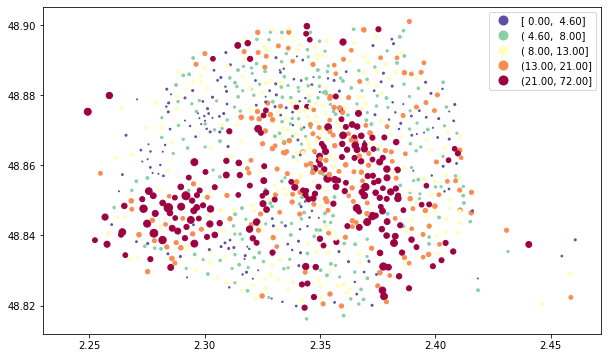

In [ ]:
#Cartographier le nombre de vélibs disponibles par station

VelibParis.plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)


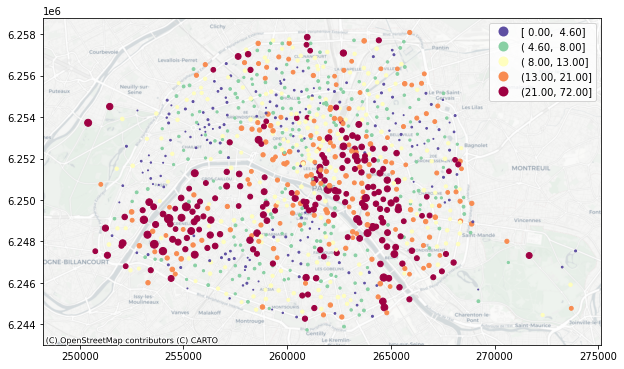

In [ ]:
#Cartographier le nombre de vélibs disponibles par station avec un fond de carte (https://dlab.berkeley.edu/blog/adding-basemaps-python-contextily)

ax = VelibParis.to_crs('EPSG:3857').plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)


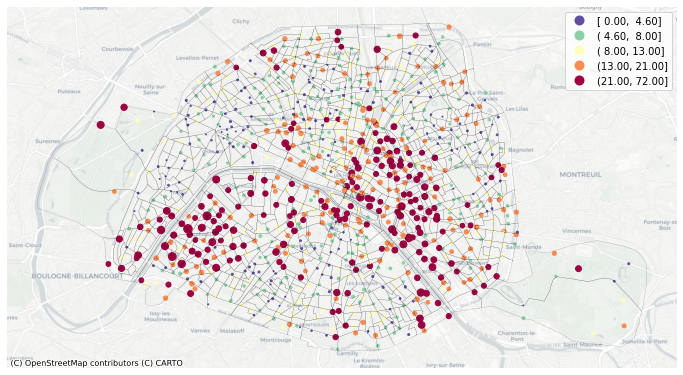

In [ ]:
#Faire une carte avec deux couches

map1, ax = plt.subplots(figsize=(12,12))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black', figsize=(50,10))
VelibParis.to_crs('EPSG:3857').plot(ax=ax,column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.show()

In [ ]:
# Jointure spatiale Velibs <> IRIS

Velibok = gpd.sjoin(VelibParis, IRISPARIS)
Velibok.head()

ebike  capacity  ...             nom_com_right code_iris_right
0      5        35  ...  Paris 16e Arrondissement       751166304
1      0        18  ...  Paris 16e Arrondissement       751166304
2      3        55  ...   Paris 6e Arrondissement       751062103
3      3        23  ...   Paris 6e Arrondissement       751062103
4      5        21  ...   Paris 9e Arrondissement       751093301

[5 rows x 28 columns]

In [ ]:
#Réorganiser la table 

Velibok = Velibok[["stationcode", "name", "capacity", "numbikesavailable", "numdocksavailable", "nom_com_left", "nom_iris_left", "geometry"]]
Velibok.head()

stationcode  ...                  geometry
0       16107  ...  POINT (2.27572 48.86598)
1       16018  ...  POINT (2.27242 48.86433)
2        6015  ...  POINT (2.33910 48.85376)
3        6014  ...  POINT (2.33995 48.85530)
4        9020  ...  POINT (2.33736 48.87930)

[5 rows x 8 columns]

In [ ]:
#Renommer les colonnes

Velibok = Velibok.rename(columns={'Code_Station': 'ID_Station', 'name':'Nom', 'capacity':'Capacite', 'numbikesavailable': 'nbVelos','numdocksavailable': 'Nbemplacements', 'nom_com_left': 'Arrondissement', 'nom_iris_left':'IRIS'})
Velibok.head()

stationcode  ...                  geometry
0       16107  ...  POINT (2.27572 48.86598)
1       16018  ...  POINT (2.27242 48.86433)
2        6015  ...  POINT (2.33910 48.85376)
3        6014  ...  POINT (2.33995 48.85530)
4        9020  ...  POINT (2.33736 48.87930)

[5 rows x 8 columns]

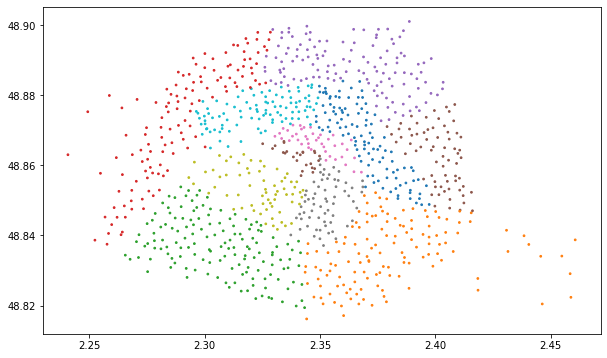

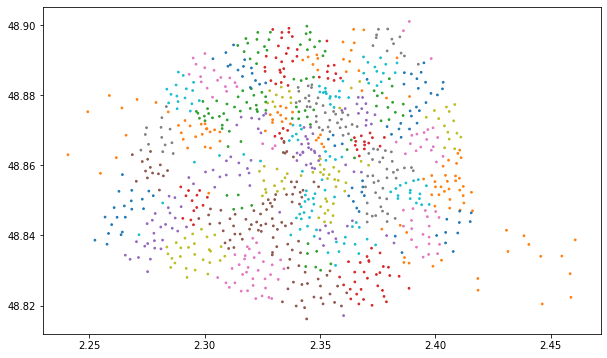

In [ ]:
#Faire deux cartes (stations catégorisées par Arrondissement et IRIS)

Velibok.plot(figsize=(10,10),column='Arrondissement', markersize= 3, legend=False)
Velibok.plot(figsize=(10,10),column='IRIS', markersize=3,  legend=False)


In [ ]:
# Compter le nombre de stations de vélib par IRIS

Nbvelib  = Velibok[["IRIS", "stationcode"]].groupby("IRIS").size()
Nbvelib =pd.DataFrame(Nbvelib)
Nbvelib = Nbvelib.rename(columns={0: 'Nbstations'})
Nbvelib.head(20)

Nbstations
IRIS                         
Amerique 11                 1
Amerique 13                 1
Amerique 14                 1
Amerique 18                 1
Amerique 19                 3
Amerique 20                 3
Amerique 22                 1
Amerique 23                 1
Amerique 24                 1
Amerique 5                  1
Amerique 6                  2
Arsenal 1                   1
Arsenal 2                   2
Arsenal 4                   2
Arts et Metiers 1           1
Arts et Metiers 3           2
Arts et Metiers 5           1
Auteuil 12                  1
Auteuil 13                  1
Auteuil 17                  1

In [ ]:
#Verification somme

total1 = VelibParis['stationcode'].count()
total2 = Nbvelib['Nbstations'].sum()

print(total1)
print(total2)

999
999


In [ ]:
# Calculer le nombre de vélib par IRIS (résumé statistique)

Nbvelib  = Velibok[["IRIS", "Capacite"]].groupby("IRIS").sum()
Nbvelib =pd.DataFrame(Nbvelib)
Nbvelib = Nbvelib.rename(columns={0: 'NbVelibs'})
Nbvelib.head(20)

Capacite
IRIS                       
Amerique 11              28
Amerique 13              18
Amerique 14              17
Amerique 18              17
Amerique 19              94
Amerique 20              75
Amerique 22              23
Amerique 23              23
Amerique 24              32
Amerique 5               21
Amerique 6               49
Arsenal 1                15
Arsenal 2                34
Arsenal 4                41
Arts et Metiers 1        35
Arts et Metiers 3        64
Arts et Metiers 5        25
Auteuil 12               53
Auteuil 13               34
Auteuil 17               21

In [ ]:
#Verification somme

total1 = VelibParis['capacity'].sum()
total2 = Nbvelib['Capacite'].sum()

print(total1)
print(total2)

32267
32267


In [ ]:
# Faire la jointure attributaire

IRISbis = IRISPARIS.merge(Nbvelib, left_on='nom_iris', right_on='IRIS')
IRISbis.head()


iris  ... Capacite
0  1907  ...       24
1  2807  ...       56
2  3103  ...       72
3  5103  ...       26
4   601  ...      133

[5 rows x 9 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


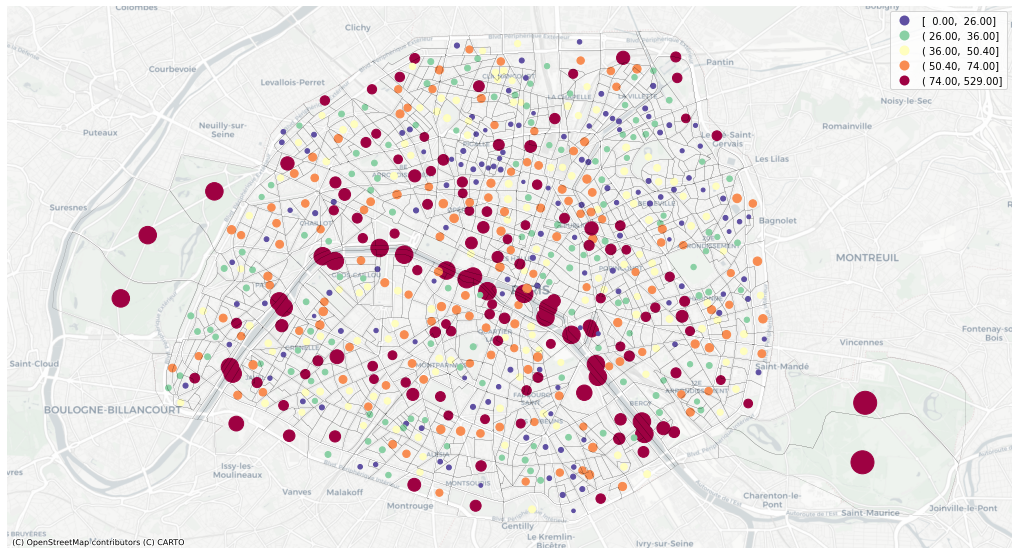

In [ ]:
#Cartographierle nombre de vélibs par IRIS

IRISbis.geometry = IRISbis['geometry'].centroid

map3, ax = plt.subplots(figsize=(18,16))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
IRISbis.to_crs('EPSG:3857').plot(ax=ax, markersize="Capacite", column="Capacite", alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.show()


**EXERCICE AUTOUR DES ABRES**

In [ ]:
# Exercice autour des arbres de Paris

## Ne garder que les arbres de Paris
## Compter le nombre d'arbres par IRIS (jointure spatiale puis agrégations statistique)
## Verifier les sommes
## Faire la jointure attibutaire vers la couches des IRIS
## Faire une carte

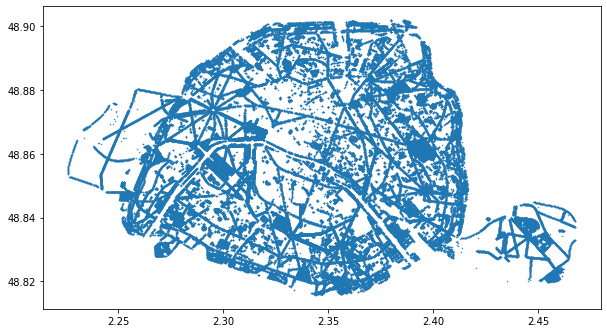

In [23]:
#Ne garder que les arbres de la ville de Paris

ArbresParis = gpd.overlay(arbres, IRISPARIS, how='intersection')
ArbresParis.plot(figsize=(10,12), markersize=0.2)


In [24]:
# Jointure spatiale Arbres <> IRIS

arbresok = gpd.sjoin(ArbresParis, IRISPARIS)
arbresok.head()

idbase typeemplacement  ... Densite_right Population_right
0  275426           Arbre  ...      5.022049       157.488237
1  235332           Arbre  ...      5.022049       157.488237
2  118247           Arbre  ...      5.022049       157.488237
3  275275           Arbre  ...      5.022049       157.488237
4  235391           Arbre  ...      5.022049       157.488237

[5 rows x 43 columns]

In [25]:
# Compter le nombre d'arbres par IRIS

NbArbres  = arbresok[["code_iris", "idbase"]].groupby("code_iris").size()
NbArbres =pd.DataFrame(NbArbres)
NbArbres = NbArbres.rename(columns={0: 'NbArbres'})
NbArbres.head(20)

KeyError: ignored

In [ ]:
#Verification somme

total1 = arbres['domanialite'].size
total2 = NbArbres['NbArbres'].sum()

print(total1)
print(total2)

204921
178745


In [ ]:
# Faire la jointure attributaire

IRISbis = IRISPARIS.merge(NbArbres, left_on='code_iris', right_on='code_iris')
IRISbis.head()


iris  ... NbArbres
0  2502  ...       78
1  3209  ...      131
2  2901  ...      129
3  3202  ...       82
4  3806  ...      109

[5 rows x 9 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


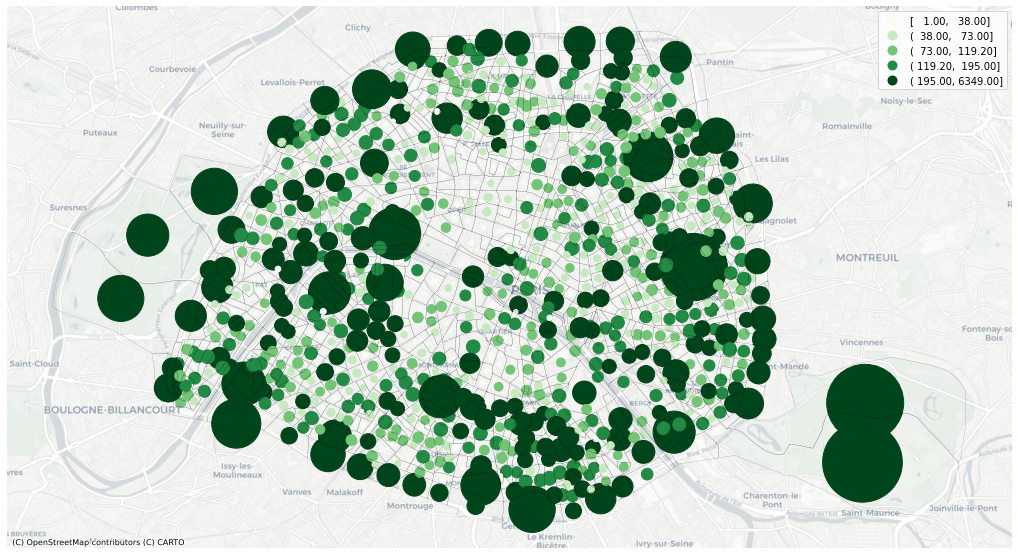

In [ ]:
#Cartographierle nombre d'arbres par IRIS

IRISbis.geometry = IRISbis['geometry'].centroid

map6, ax = plt.subplots(figsize=(18,16))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
IRISbis.to_crs('EPSG:3857').plot(ax=ax, markersize="NbArbres", column="NbArbres", alpha=1, cmap='Greens',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.show()


**JOINTURE ATTRIBUTAIRE / CACUL DE DENSITE / CARTOGRAPHIE THEMATIQUE**

In [8]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O population.csv https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D


--2021-02-07 21:26:58--  https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 3.210.242.135, 52.3.80.148, 3.209.95.31, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|3.210.242.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘population.csv’

population.csv          [ <=>                ]   2.70M  14.8MB/s    in 0.2s    

2021-02-07 21:26:59 (14.8 MB/s) - ‘population.csv’ saved [2829414]



In [9]:
#Importer CSV to dataframe

population = pd.read_csv("population.csv", sep=',')
population.head()

OBJECTID    n_sq_ir  c_cainsee  ...           l_epci  shape_Length     shape_Area
0         1  930003891      93048  ...  T8 Est Ensemble   1927.186327  139705.062882
1         2  930003875      93048  ...  T8 Est Ensemble   1597.143066  106750.396820
2         3  930003874      93048  ...  T8 Est Ensemble   2494.946453  209582.967651
3         4  930000933      93048  ...  T8 Est Ensemble   2349.691506  157719.269811
4         5  930000935      93048  ...  T8 Est Ensemble   2782.930332  261075.373256

[5 rows x 72 columns]

In [10]:
# Ne garder que les colonne importantes

PopulationOK = population[["c_ir", "l_ir", "nb_densite", "nb_pop"]]
PopulationOK.head()

c_ir                       l_ir  nb_densite       nb_pop
0  930480801   Bel Air Grands Pêchers 1  218.821133  3057.042017
1  930480803   Bel Air Grands Pechers 3  191.134334  2040.366599
2  930480901  Ramenas Fabien Lagrange 1   93.199893  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  160.958422  2538.624479
4  930481002         Branly Boissiere 2   67.042616  1750.317596

In [11]:
#Renommer les colonnes

PopulationOK = PopulationOK.rename(columns={'c_ir': 'Code_IRIS', 'l_ir':'Libelle', 'nb_densite':'Densite', 'nb_pop': 'Population'})
PopulationOK.head()

Code_IRIS                    Libelle     Densite   Population
0  930480801   Bel Air Grands Pêchers 1  218.821133  3057.042017
1  930480803   Bel Air Grands Pechers 3  191.134334  2040.366599
2  930480901  Ramenas Fabien Lagrange 1   93.199893  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  160.958422  2538.624479
4  930481002         Branly Boissiere 2   67.042616  1750.317596

In [12]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(PopulationOK, left_on='code_iris', right_on='Code_IRIS')
IRISPARIS.head()


iris                nom_iris  ...     Densite   Population
0  2502  Saint-Thomas d'Aquin 2  ...  225.082407  1524.027722
1  3209                Europe 9  ...   80.627050   948.341332
2  2901        Champs Elysees 1  ...   85.899199  1030.957203
3  3202                Europe 2  ...  178.500465  1635.507908
4  3806     Porte Saint-Denis 6  ...  283.076295  3780.732850

[5 rows x 12 columns]

In [13]:
# Reprojeter la couche IRIS pour le calcul de surface

IRIS2154 = IRISPARIS.to_crs(2154)
IRIS2154.crs


<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
# Ajouter une colonne Surface à la couche des IRIS

IRIS2154["surface"] = IRIS2154['geometry'].area/1000000
IRIS2154.head(10) 

iris                nom_iris typ_iris  ...     Densite   Population   surface
0  2502  Saint-Thomas d'Aquin 2        H  ...  225.082407  1524.027722  0.069480
1  3209                Europe 9        A  ...   80.627050   948.341332  0.117733
2  2901        Champs Elysees 1        H  ...   85.899199  1030.957203  0.121188
3  3202                Europe 2        H  ...  178.500465  1635.507908  0.090343
4  3806     Porte Saint-Denis 6        H  ...  283.076295  3780.732850  0.134006
5  4203        Saint-Ambroise 3        H  ...  485.102643  2705.444231  0.054908
6  4315             Roquette 15        H  ...  292.105491  1851.683398  0.062301
7  4313             Roquette 13        H  ...  425.308101  2147.748684  0.050441
8  4621               Picpus 21        H  ...  266.953225  2423.879787  0.089226
9  5123       Maison Blanche 23        H  ...  398.432463  2207.016203  0.054690

[10 rows x 13 columns]

In [15]:
#Calculer la densité de population des IRIS


IRIS2154["Densitebis"] = IRIS2154["Population"] / IRIS2154["surface"]
IRIS2154.head()

iris                nom_iris typ_iris  ...   Population   surface    Densitebis
0  2502  Saint-Thomas d'Aquin 2        H  ...  1524.027722  0.069480  21934.831423
1  3209                Europe 9        A  ...   948.341332  0.117733   8055.012340
2  2901        Champs Elysees 1        H  ...  1030.957203  0.121188   8507.060949
3  3202                Europe 2        H  ...  1635.507908  0.090343  18103.398526
4  3806     Porte Saint-Denis 6        H  ...  3780.732850  0.134006  28213.222288

[5 rows x 14 columns]

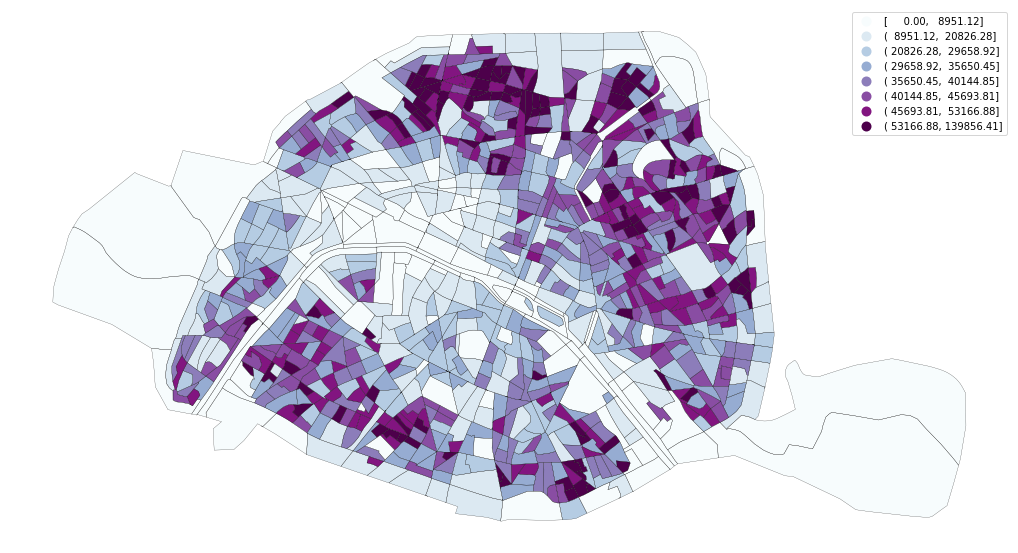

In [16]:
#Faire une carte des densité de population par IRIS

map6, ax = plt.subplots(figsize=(18,16))
IRISPARIS.boundary.to_crs('EPSG:2154').plot(ax=ax, linewidth=0.2, color = 'black')
IRIS2154.plot(ax=ax, k=8, column='Densitebis', cmap='BuPu',scheme='quantiles', legend=True)
ax.axis("off")
plt.show()

geometry  ...   Population
nom_com                                                                      ...             
Paris 10e Arrondissement  POLYGON ((2.37022 48.88240, 2.37024 48.88151, ...  ...  3780.732850
Paris 11e Arrondissement  POLYGON ((2.36664 48.86312, 2.36616 48.86396, ...  ...  2705.444231
Paris 12e Arrondissement  POLYGON ((2.36897 48.84252, 2.36810 48.84321, ...  ...  2423.879787
Paris 13e Arrondissement  POLYGON ((2.34155 48.82839, 2.34149 48.82857, ...  ...  2207.016203
Paris 14e Arrondissement  POLYGON ((2.30187 48.82500, 2.30132 48.82513, ...  ...  2227.356880

[5 rows x 11 columns]

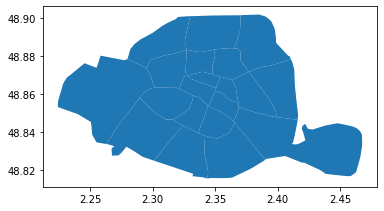

In [ ]:
# Créer une couche des arrondissements

ARDT = IRISPARIS.dissolve(by='nom_com')
ARDT.plot()
ARDT.head()

In [ ]:
# Créer une couche des arrondissements avec une agrégation statistiques (Population)

ARDT = IRIS2154.dissolve(by='insee_com', aggfunc='sum')
ARDT.head()


geometry  ...     Densitebis
insee_com                                                     ...               
75101      POLYGON ((651906.000 6861749.600, 651826.500 6...  ...  196419.344299
75102      POLYGON ((650836.900 6863382.070, 650766.800 6...  ...  328710.884634
75103      POLYGON ((652319.300 6862646.600, 652328.020 6...  ...  557159.554395
75104      POLYGON ((652234.790 6861585.390, 652145.040 6...  ...  359457.988367
75105      POLYGON ((651328.600 6860229.400, 651363.510 6...  ...  834564.296242

[5 rows x 9 columns]

In [ ]:
populationtotale = ARDT["Population"].sum()


2206488.0000000005


In [ ]:
# Buffer de 300m autour des toilettes

Toilette['geometry'] = Metros.geometry.buffer(300)
Metros.plot()